## Part 2

In [1]:
library(hexView)

data <- readEViews('EXPEND.WF1')

Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”
Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”


In [2]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



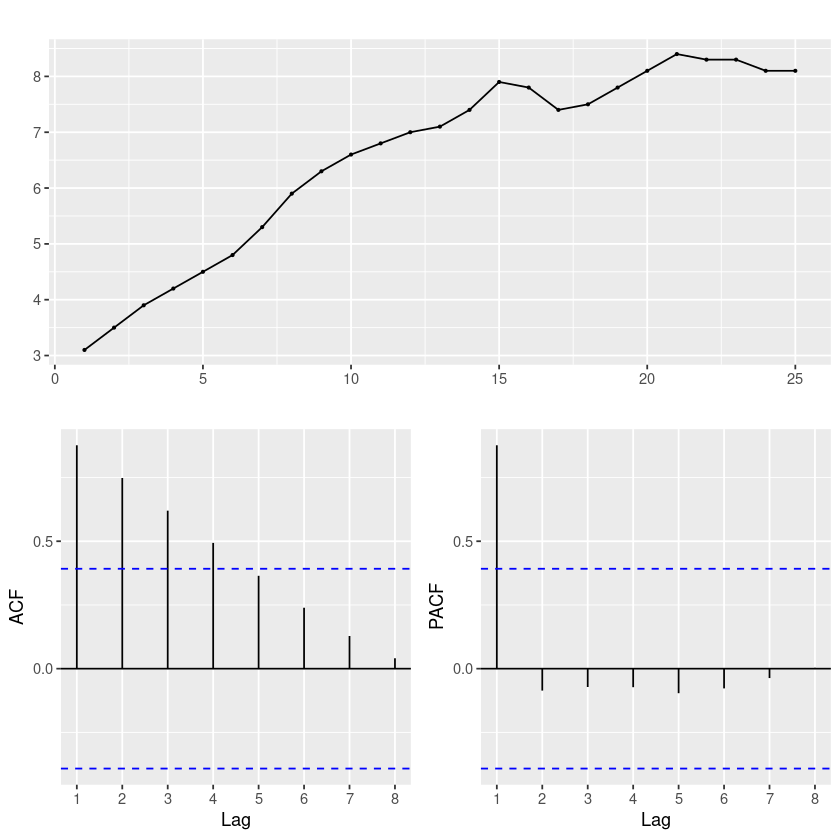

In [14]:
ggtsdisplay((ts(data['COSM'])))

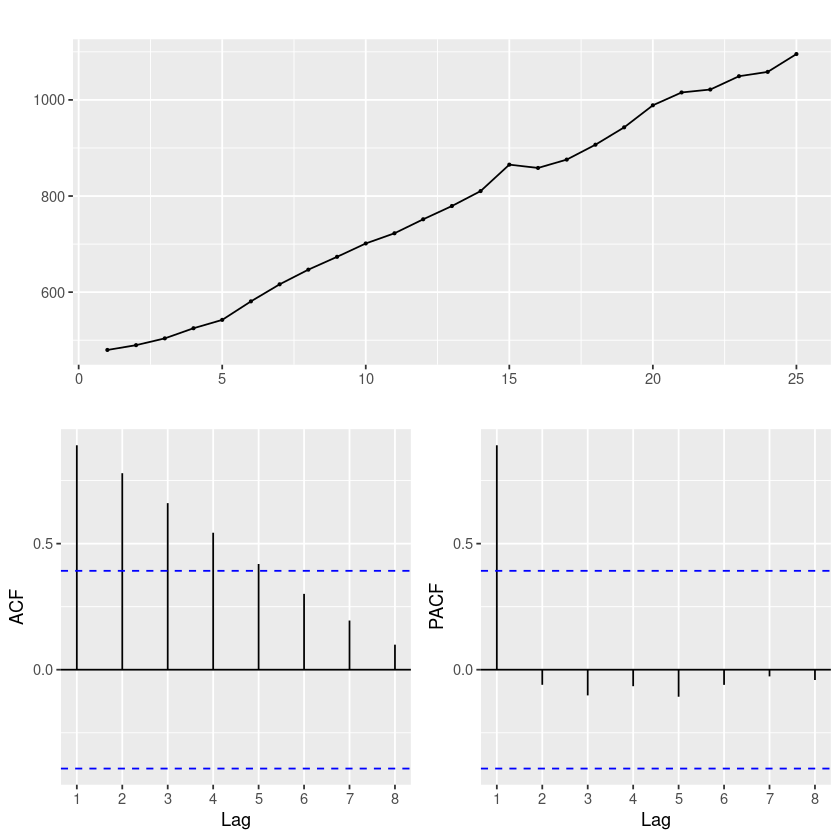

In [15]:
ggtsdisplay((ts(data['DPI'])))

In [6]:
mod1 <- lm(COSM~DPI,data=data)
summary(mod1)


Call:
lm(formula = COSM ~ DPI, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06656 -0.32737 -0.06412  0.58641  0.69526 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3372820  0.4569091   0.738    0.468    
DPI         0.0079826  0.0005683  14.048 8.97e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5542 on 23 degrees of freedom
Multiple R-squared:  0.8956,	Adjusted R-squared:  0.8911 
F-statistic: 197.3 on 1 and 23 DF,  p-value: 8.969e-13


In [7]:
dwtest(mod1, alternative = 'greater')


	Durbin-Watson test

data:  mod1
DW = 0.14512, p-value = 3.227e-15
alternative hypothesis: true autocorrelation is greater than 0


In [8]:
mod1 <- lm(diff(COSM)~diff(DPI),data=data)
summary(mod1)


Call:
lm(formula = diff(COSM) ~ diff(DPI), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53641 -0.12845  0.01556  0.13941  0.34944 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.015219   0.096425  -0.158   0.8760  
diff(DPI)    0.008714   0.003344   2.606   0.0161 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2156 on 22 degrees of freedom
Multiple R-squared:  0.2358,	Adjusted R-squared:  0.2011 
F-statistic: 6.789 on 1 and 22 DF,  p-value: 0.01614


In [9]:
dwtest(mod1, alternative = 'greater')


	Durbin-Watson test

data:  mod1
DW = 0.73033, p-value = 0.0001958
alternative hypothesis: true autocorrelation is greater than 0


In [16]:
mod1 <- lm(COSM~DPI+PRELCOSM,data=data)
# summary(mod1)
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 0.81653, p-value = 5.252e-05
alternative hypothesis: true autocorrelation is greater than 0


In [17]:
mod1 <- lm(log(COSM)~log(DPI)+log(PRELCOSM),data=data)
# summary(mod1)
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 0.47426, p-value = 2.86e-08
alternative hypothesis: true autocorrelation is greater than 0


In [18]:
mod1 <- lm(COSM~DPI+I(DPI^2)+PRELCOSM,data=data)
# summary(mod1)
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 0.91506, p-value = 0.0001474
alternative hypothesis: true autocorrelation is greater than 0


In [19]:
mod1 <- lm(COSM~DPI+I(DPI^2)+I(DPI^3)+PRELCOSM,data=data)
# summary(mod1)
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 1.1516, p-value = 0.0006682
alternative hypothesis: true autocorrelation is greater than 0


In [20]:
library('orcutt')

In [25]:
mod1 <- lm(diff(COSM)~diff(DPI),data=data)
summary(mod1)


Call:
lm(formula = (COSM) ~ (DPI), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06656 -0.32737 -0.06412  0.58641  0.69526 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3372820  0.4569091   0.738    0.468    
DPI         0.0079826  0.0005683  14.048 8.97e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5542 on 23 degrees of freedom
Multiple R-squared:  0.8956,	Adjusted R-squared:  0.8911 
F-statistic: 197.3 on 1 and 23 DF,  p-value: 8.969e-13


In [26]:
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 0.14512, p-value = 3.227e-15
alternative hypothesis: true autocorrelation is greater than 0


In [27]:
coch = cochrane.orcutt(mod1)
summary(coch)

Call:
lm(formula = (COSM) ~ (DPI), data = data)

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 3.8507530  1.0670374   3.609 0.0015580 ** 
DPI         0.0043042  0.0011103   3.877 0.0008144 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1724 on 22 degrees of freedom
Multiple R-squared:  0.4059 ,  Adjusted R-squared:  0.3789
F-statistic: 15 on 1 and 22 DF,  p-value: < 8.144e-04

Durbin-Watson statistic 
(original):    0.14512 , p-value: 3.227e-15
(transformed): 1.08288 , p-value: 4.105e-03

In [24]:
dwtest(coch)


	Durbin-Watson test

data:  coch
DW = 2.0211, p-value = 0.558
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
mod1 <- lm(COSM~DPI+PRELCOSM,data=data)
# summary(mod1)
coch = cochrane.orcutt(mod1)
# summary(coch)
dwtest(mod1)
dwtest(coch)

In [ ]:
mod1 <- lm(COSM~DPI,data=data)
coch <- cochrane.orcutt(mod1)
summary(coch)

In [28]:
library(nlme)    
library(car)


Attaching package: ‘nlme’


The following object is masked from ‘package:forecast’:

    getResponse


Loading required package: carData



In [33]:
cs1 <- corARMA(form = ~ 1, p = 1)
m2a<-gls((COSM)~(DPI), data=data, correlation=cs1)
summary(m2a)
v <- m2a$residuals
attr(v,"std") <- NULL
durbinWatsonTest(v)

Generalized least squares fit by REML
  Model: (COSM) ~ (DPI) 
  Data: data 
       AIC      BIC    logLik
  11.59631 16.13828 -1.798153

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.9981507 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept) -0.8679344  3.622737 -0.239580  0.8128
DPI          0.0082422  0.001481  5.566291  0.0000

 Correlation: 
    (Intr)
DPI -0.322

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.01747133  0.21384654  0.25893713  0.45828153  0.49394205 

Residual standard error: 3.467884 
Degrees of freedom: 25 total; 23 residual

[1] 0.03173224

In [34]:
cs1 <- corARMA(form = ~ 1, q = 1)
m2a<-gls(COSM~DPI, data=data, correlation=cs1)
summary(m2a)
v <- m2a$residuals
attr(v,"std") <- NULL
durbinWatsonTest(v)

Generalized least squares fit by REML
  Model: COSM ~ DPI 
  Data: data 
       AIC      BIC    logLik
  38.13569 42.67767 -15.06784

Correlation Structure: ARMA(0,1)
 Formula: ~1 
 Parameter estimate(s):
   Theta1 
0.9796628 

Coefficients:
                Value Std.Error  t-value p-value
(Intercept) 0.3682516 0.4921640  0.74823  0.4619
DPI         0.0078843 0.0006092 12.94167  0.0000

 Correlation: 
    (Intr)
DPI -0.968

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.341371685 -0.683687859 -0.005172295  1.385876728  1.639269811 

Residual standard error: 0.4485966 
Degrees of freedom: 25 total; 23 residual

[1] 0.1440395

In [35]:
cs1 <- corARMA(form = ~ 1, p = 1,q = 1)
m2a<-gls(COSM~DPI, data=data, correlation=cs1)
summary(m2a)
v <- m2a$residuals
attr(v,"std") <- NULL
durbinWatsonTest(v)

Generalized least squares fit by REML
  Model: COSM ~ DPI 
  Data: data 
       AIC      BIC   logLik
  4.077992 9.755463 2.961004

Correlation Structure: ARMA(1,1)
 Formula: ~1 
 Parameter estimate(s):
     Phi1    Theta1 
0.9987786 0.6795141 

Coefficients:
                Value Std.Error  t-value p-value
(Intercept) 0.3257517  5.883781 0.055364  0.9563
DPI         0.0066172  0.001496 4.424580  0.0002

 Correlation: 
    (Intr)
DPI -0.203

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-0.06893391  0.10873423  0.21216138  0.27884518  0.31852486 

Residual standard error: 5.802964 
Degrees of freedom: 25 total; 23 residual

[1] 0.02847212

In [ ]:
# cs1 <- corARMA(p = 1,q = 1)
m2a<-lm(COSM~DPI, data=data)
summary(m2a)

In [ ]:
# cs1 <- corARMA(p = 1,q = 1)
m2a<-gls(COSM~DPI, data=data)
summary(m2a)
v <- m2a$residuals
attr(v,"std") <- NULL
durbinWatsonTest(v)

In [ ]:
c1 <- ts(data['COSM'], frequency = 4, start=c(1990,1))
# p1 <- ts(data['PCOSM'], frequency = 4, start=c(1990,1))
d1 <- ts(data['DPI'], frequency = 4, start=c(1990,1))

mod3 <- dynlm(c1~d1+L(c1))
summary(mod3)

In [ ]:
library(ecm)
ddd <- durbinH(mod3, "L(c1)")
ddd

In [39]:
c1 <- ts(data['COSM'], frequency = 4, start=c(1990,1))
# p1 <- ts(data['PCOSM'], frequency = 4, start=c(1990,1))
d1 <- ts(data['DPI'], frequency = 4, start=c(1990,1))

mod3 <- dynlm(c1~d1+L(c1)+L(d1))
summary(mod3)

library(ecm)
ddd <- durbinH(mod3, "L(c1)")
ddd


Time series regression with "ts" data:
Start = 1990(2), End = 1996(1)

Call:
dynlm(formula = c1 ~ d1 + L(c1) + L(d1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42194 -0.06078  0.03108  0.08068  0.24459 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.587813   0.139507   4.214 0.000427 ***
d1           0.009543   0.002347   4.066 0.000603 ***
L(c1)        0.936830   0.062031  15.103 2.12e-12 ***
L(d1)       -0.009822   0.002353  -4.174 0.000468 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.15 on 20 degrees of freedom
Multiple R-squared:  0.9918,	Adjusted R-squared:  0.9906 
F-statistic: 810.9 on 3 and 20 DF,  p-value: < 2.2e-16


[1] 0.8165003

In [38]:
library(dynlm)

In [36]:
library(nlWaldTest)

In [40]:
mod3 <- dynlm(c1~d1+L(d1)+L(c1))
summary(mod3)


Time series regression with "ts" data:
Start = 1990(2), End = 1996(1)

Call:
dynlm(formula = c1 ~ d1 + L(d1) + L(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42194 -0.06078  0.03108  0.08068  0.24459 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.587813   0.139507   4.214 0.000427 ***
d1           0.009543   0.002347   4.066 0.000603 ***
L(d1)       -0.009822   0.002353  -4.174 0.000468 ***
L(c1)        0.936830   0.062031  15.103 2.12e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.15 on 20 degrees of freedom
Multiple R-squared:  0.9918,	Adjusted R-squared:  0.9906 
F-statistic: 810.9 on 3 and 20 DF,  p-value: < 2.2e-16


In [41]:
nlConfint(mod3, "b[3]=-b[2]*b[4]")
nlWaldtest(mod3, "b[3]=-b[2]*b[4]")

# nlWaldtest(lm1,c("b[2]^3+b[3]*b[1]+0.07", "b[2]"))

Warning message:
“invalid formula "~ b[3]=-b[2]*b[4]": assignment is deprecated”
Warning message:
“invalid formula "~ b3=-b2*b4": assignment is deprecated”


,value,2.5 %,97.5 %
b[3]=-b[2]*b[4],0.9368305,0.8152523,1.058409



	Wald Chi-square test of a restriction on model parameters

data:  mod3
Chisq = 13.162, df = 1, p-value = 0.0002856


In [ ]:
# linearHypothesis(mod4, c("L(res)=0", "L(res, 2)=0"))